# Antes de empezar :
   - Estos ejercicios están relacionados con las lecciones Subconjunto y Estadísticas descriptivas.
   - Tenga en cuenta que necesitará utilizar algunas de las funciones que aprendió en las lecciones anteriores.
   - Todos los conjuntos de datos se proporcionan en la carpeta `your-code` de este laboratorio.
   - Elabora tus códigos y resultados tanto como puedas.
   - Esfuérzate al máximo para responder a las preguntas y completar las tareas y, sobre todo, ¡¡¡disfruta del proceso!!!

#### Importa todas las librerías necesarias

In [4]:
import pandas as pd
from scipy.stats import binom
from scipy import stats
import numpy
import matplotlib.pyplot as plt


# Desafío 1

#### En este reto utilizaremos el archivo `Temp_States.csv`. 

#### Primero impórtalo en un marco de datos llamado `temp`.

In [5]:
temp = pd.read_csv("Temp_States.csv")

#### Print `temp`

In [6]:
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore los tipos de datos del marco de datos Temp. ¿Qué tipo de datos tenemos? Comenta tu resultado.

In [7]:
temp.info()
"""Tenemos 3 columnas (city, state, Temperature) donde las columnas 
city y state son un object y la columna Temperature es un float"""


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 300.0+ bytes


'Tenemos 3 columnas (city, state, Temperature) donde las columnas \ncity y state son un object y la columna Temperature es un float'

#### Selecciona las filas en las que el estado es New York

In [8]:
ny = temp.loc[temp['State'] == 'New York']
temp.head()

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444


#### ¿Cuál es la temperatura media de las ciudades de Nueva York?

In [9]:
temp_med_ny = ny['Temperature'].mean()
print(temp_med_ny)

10.74074074074074


#### Queremos conocer las ciudades y estados con temperaturas superiores a 15 grados centígrados.

In [10]:
temp_up15 = temp.loc[temp['Temperature'] > 15]
print(temp_up15)

       City        State  Temperature
0       NYC     New York    19.444444
3  Hartford  Connecticut    17.222222
5    Treton   New Jersey    22.222222
6    Newark   New Jersey    20.000000


#### Ahora, devuelva sólo las ciudades que tengan una temperatura superior a 15 grados centígrados.

In [11]:
city_up15 = temp_up15.loc[[0,3,5,6]]
print(city_up15)

       City        State  Temperature
0       NYC     New York    19.444444
3  Hartford  Connecticut    17.222222
5    Treton   New Jersey    22.222222
6    Newark   New Jersey    20.000000


#### Queremos saber qué ciudades tienen una temperatura superior a 15 grados Celcius e inferior a 20 grados Celcius

*Pista: Primero escriba la condición y luego seleccione las filas.

In [12]:
condicion = (temp['Temperature'] > 15) & (temp['Temperature'] < 20)
temp_up15_und20 = temp.loc[condicion]
print(temp_up15_und20)

       City        State  Temperature
0       NYC     New York    19.444444
3  Hartford  Connecticut    17.222222


#### Halla la media y la desviación estándar de la temperatura de cada estado.

*Pista: Utiliza las funciones de la lección Manipulación de datos*.

In [13]:
estadisticas_por_estado = temp.groupby('State')['Temperature'].agg(['mean', 'std']).reset_index()
print(estadisticas_por_estado)


         State       mean       std
0  Connecticut  15.833333  1.964186
1   New Jersey  21.111111  1.571348
2     New York  10.740741  8.133404


# Desafío 2

#### Cargar el fichero `employee.csv` en un DataFrame. Llama al dataframe `employee`.

In [14]:
archivo = pd.read_csv("Employee.csv")
employee = pd.DataFrame(archivo)
print(employee)

     Name Department Education Gender      Title  Years  Salary
0    Jose         IT  Bachelor      M    analyst      1      35
1   Maria         IT    Master      F    analyst      2      30
2   David         HR    Master      M    analyst      2      30
3   Sonia         HR  Bachelor      F    analyst      4      35
4  Samuel      Sales    Master      M  associate      3      55
5     Eva      Sales  Bachelor      F  associate      2      55
6  Carlos         IT    Master      M         VP      8      70
7   Pedro         IT       Phd      M  associate      7      60
8     Ana         HR    Master      F         VP      8      70


#### Explore los tipos de datos del marco de datos Temp. Comenta tus resultados

In [15]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 636.0+ bytes


#### Muestre visualmente la distribución de frecuencias (histograma) del conjunto de datos de empleados. Describa en pocas palabras estos histogramas.

array([[<Axes: title={'center': 'Years'}>,
        <Axes: title={'center': 'Salary'}>]], dtype=object)

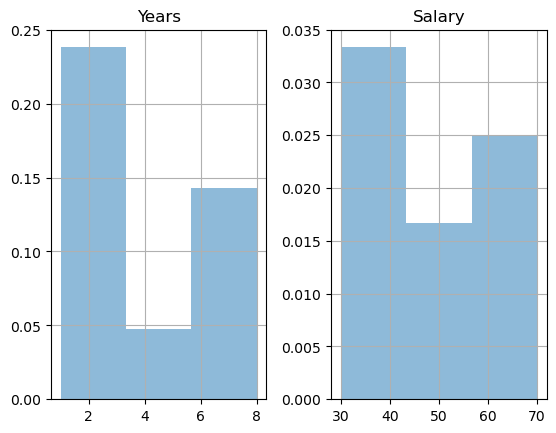

In [16]:
employee.hist(density=True, bins=3, alpha=0.5)

#### ¿Cuál es el salario medio en esta empresa?

In [17]:
mean_salario = employee['Salary'].mean()
print(mean_salario)

48.888888888888886


In [18]:
employee.describe()

,Years,Salary
count,9.000000,9.000000
mean,4.111111,48.888889
std,2.803767,16.541194
min,1.000000,30.000000
25%,2.000000,35.000000
50%,3.000000,55.000000
75%,7.000000,60.000000
max,8.000000,70.000000


#### ¿Cuál es el salario más alto?

In [19]:
max_salario = employee['Salary'].max()
print(max_salario)

70


#### ¿Cuál es el salario más bajo?

In [20]:
min_salario = employee['Salary'].min()
print(min_salario)

30


#### ¿Quiénes son los empleados con el salario más bajo?

In [21]:
emp_min_salario = employee.loc[employee['Salary'] == min_salario]
print(emp_min_salario)

    Name Department Education Gender    Title  Years  Salary
1  Maria         IT    Master      F  analyst      2      30
2  David         HR    Master      M  analyst      2      30


#### ¿Podría darnos toda la información sobre un empleado llamado David?

In [22]:
David = employee.loc[employee['Name'] == 'David']
print(David)

    Name Department Education Gender    Title  Years  Salary
2  David         HR    Master      M  analyst      2      30


#### ¿Podría dar sólo el sueldo de David?

In [23]:
sueldo_david = employee.loc[employee['Name'] == 'David', 'Salary'].values[0]
print(sueldo_david)

30


#### Printea todas las líneas en las que el cargo es asociado

In [24]:
employee_assoc = employee.loc[employee['Title'] == 'associate']
print(employee_assoc)

     Name Department Education Gender      Title  Years  Salary
4  Samuel      Sales    Master      M  associate      3      55
5     Eva      Sales  Bachelor      F  associate      2      55
7   Pedro         IT       Phd      M  associate      7      60


#### Printea las 3 primeras filas de tu dataframe

##### Consejo : Hay 2 maneras de hacerlo. Hazlo de las dos maneras

In [25]:
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [26]:
employee.iloc[:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### ¿Encuentra a los empleados cuyo cargo es asociado y cuyo salario es superior a 55?

In [27]:
condicion1 = [emp['Name'] for emp in employee if emp['Title'] == 'associate' and emp['Salary'] > 55]


TypeError: string indices must be integers, not 'str'

#### Agrupa a los empleados en función del número de años que llevan trabajando. ¿Cuáles son los salarios medios de cada grupo?

In [ ]:
senority = [employee.groupby(['Years'])['Salary'].mean()]
print(senority)



[Years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: Salary, dtype: float64]


#### ¿Cuál es el salario medio por título?

In [ ]:
title = employee.groupby(['Title'])['Salary'].mean()
print(title)

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64


#### Muestra un resumen visual de los datos utilizando boxplot. ¿Cuáles son los cuartiles primero y tercero? Comenta tus resultados.

* Pista : Cuantiles vs Cuartiles*.
En Probabilidad y Estadística, los cuantiles son puntos de corte que dividen el rango de una distribución de probabilidad en intervalos continuos con probabilidades iguales. Cuando la división es en cuatro partes, los valores de la variable correspondientes al 25%, 50% y 75% de la distribución total se denominan cuartiles.

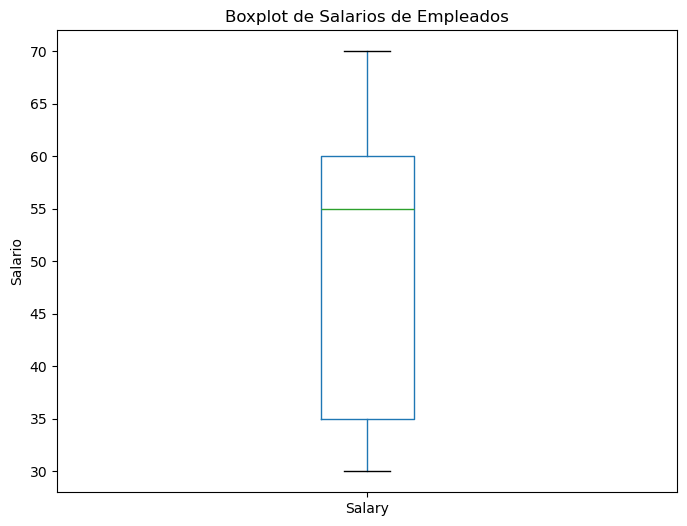

Cuartil 1 (Q1): 35.0
Cuartil 3 (Q3): 60.0


In [ ]:
plt.figure(figsize=(8, 6))
employee.boxplot(column='Salary', grid=False)
plt.title('Boxplot de Salarios de Empleados')
plt.ylabel('Salario')
plt.show()

Q1 = employee['Salary'].quantile(0.25)
Q3 = employee['Salary'].quantile(0.75)

In [ ]:
print(f"Cuartil 1 (Q1): {Q1}")

Cuartil 1 (Q1): 35.0


In [ ]:
print(f"Cuartil 3 (Q1): {Q3}")

Cuartil 3 (Q1): 60.0


#### ¿Es diferente el salario medio por género?

In [ ]:
gender = employee.groupby(['Gender'])['Salary'].mean()
print(gender)

Gender
F    47.5
M    50.0
Name: Salary, dtype: float64


#### Encuentra el mínimo, la media y el máximo de todas las columnas numéricas para cada Departamento.

##### Sugerencia: Utiliza las funciones de la lección Manipulación de Datos

In [ ]:
min_mean_max = employee.groupby('Department').agg({'Years':['min', 'mean', 'max'],'Salary':['min', 'mean', 'max']})
print(min_mean_max)

           Years               Salary           
             min      mean max    min   mean max
Department                                      
HR             2  4.666667   8     30  45.00  70
IT             1  4.500000   8     30  48.75  70
Sales          2  2.500000   3     55  55.00  55


### Pregunta bonus

#### Para cada departamento, calcule la diferencia entre el salario máximo y el salario mínimo.

##### * Sugerencia: pruebe a utilizar `agg` o `apply` y `lambda`*.

In [ ]:
# your answer here


# Desafío 3

#### Abra el conjunto de datos Orders.csv. Nombre el conjunto de datos pedidos

In [30]:
pedidos = pd.read_csv('Orders.csv')

#### Explore su conjunto de datos observando los tipos de datos y las estadísticas de resumen. Comenta tus resultados

In [31]:
pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


In [32]:
pedidos.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,397924.0,278465.221859,152771.368303,0.0,148333.75,284907.50,410079.25,541908.00
InvoiceNo,397924.0,560617.126645,13106.167695,536365.0,549234.00,561893.00,572090.00,581587.00
year,397924.0,2010.934259,0.247829,2010.0,2011.00,2011.00,2011.00,2011.00
month,397924.0,7.612537,3.416527,1.0,5.00,8.00,11.00,12.00
day,397924.0,3.614555,1.928274,1.0,2.00,3.00,5.00,7.00
hour,397924.0,12.728247,2.273535,6.0,11.00,13.00,14.00,20.00
Quantity,397924.0,13.021823,180.420210,1.0,2.00,6.00,12.00,80995.00
UnitPrice,397924.0,3.116174,22.096788,0.0,1.25,1.95,3.75,8142.75
CustomerID,397924.0,15294.315171,1713.169877,12346.0,13969.00,15159.00,16795.00,18287.00
amount_spent,397924.0,22.394749,309.055588,0.0,4.68,11.80,19.80,168469.60


In [33]:
pedidos.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


#### ¿Cuál es el precio medio de compra?

In [34]:
mean = pedidos['amount_spent'].mean()
print(f"El precio medio de compra es de {mean:.2f}")

El precio medio de compra es de 22.39


#### ¿Cuáles fueron los precios de compra más altos y más bajos? 

In [35]:
max = pedidos['amount_spent'].max()
print(f"El precio mas alto de compra fue de {max:.2f}")

El precio mas alto de compra fue de 168469.60


In [36]:
min = pedidos['amount_spent'].min()
print(f"El precio mas bajo de compra fue de {min:.2f}")

El precio mas bajo de compra fue de 0.00


#### Seleccione todos los clientes que tenemos en España

In [37]:
spain = pedidos.loc[pedidos['Country'] == 'Spain']
print(spain)

        Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
4250          6421     536944     22383  2010     12    5    12   
4251          6422     536944     22384  2010     12    5    12   
4252          6423     536944     20727  2010     12    5    12   
4253          6424     536944     20725  2010     12    5    12   
4254          6425     536944     20728  2010     12    5    12   
...            ...        ...       ...   ...    ...  ...   ...   
394733      535271     581193     23291  2011     12    3    17   
394734      535272     581193    85232D  2011     12    3    17   
394735      535273     581193     22721  2011     12    3    17   
394736      535274     581193     23241  2011     12    3    17   
394737      535275     581193     23247  2011     12    3    17   

                          Description  Quantity          InvoiceDate  \
4250          lunch bag suki  design         70  2010-12-03 12:20:00   
4251          lunch bag pink polkadot       100  20

#### ¿Cuántos clientes tenemos en España?
##### Pista : Utiliza value_counts()

In [38]:
clientes_spain = pedidos.value_counts('Country')['Spain']
print(clientes_spain)

2485


#### Selecciona todos los clientes que han comprado más de 50 artículos ?

In [39]:
art50 = pedidos.loc[pedidos['Quantity'] > 50]
print(art50)


        Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
46              46     536371     22086  2010     12    3     9   
83              83     536376     21733  2010     12    3     9   
96              96     536378     21212  2010     12    3     9   
102            102     536378    85071B  2010     12    3     9   
174            176     536386    85099C  2010     12    3     9   
...            ...        ...       ...   ...    ...  ...   ...   
397720      541702     581566     23404  2011     12    5    11   
397721      541703     581567     21417  2011     12    5    11   
397729      541711     581567     21326  2011     12    5    11   
397761      541746     581571     23167  2011     12    5    12   
397882      541867     581584     20832  2011     12    5    12   

                               Description  Quantity          InvoiceDate  \
46         paper chain kit 50's christmas         80  2010-12-01 09:00:00   
83        red hanging heart t-light holde

#### Selecciona pedidos de España superiores a 50 artículos

In [40]:
condicion2 = (pedidos['Country'] == 'Spain') & (pedidos['Quantity'] > 50)
spain50 = pedidos.loc[condicion2]
print(spain50)

        Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
4250          6421     536944     22383  2010     12    5    12   
4251          6422     536944     22384  2010     12    5    12   
4252          6423     536944     20727  2010     12    5    12   
4253          6424     536944     20725  2010     12    5    12   
4254          6425     536944     20728  2010     12    5    12   
32454        52416     540785    84997B  2011      1    2    11   
32455        52417     540785    84997D  2011      1    2    11   
32456        52418     540785    84997C  2011      1    2    11   
32457        52419     540785    84997A  2011      1    2    11   
91155       136767     547972     22383  2011      3    1    16   
91156       136768     547972     22384  2011      3    1    16   
91159       136771     547972     20728  2011      3    1    16   
174442      248797     558871     22384  2011      7    1    13   
174443      248798     558871     20727  2011      7    1    1

#### Seleccionar todos los pedidos gratuitos

In [41]:
free = pedidos.loc[pedidos['amount_spent'] == 0]
print(free)

        Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
6914          9302     537197     22841  2010     12    7    14   
22539        33576     539263     22580  2010     12    4    14   
25379        40089     539722     22423  2010     12    2    13   
29080        47068     540372     22090  2011      1    4    16   
29082        47070     540372     22553  2011      1    4    16   
34494        56674     541109     22168  2011      1    4    15   
53788        86789     543599    84535B  2011      2    4    13   
85671       130188     547417     22062  2011      3    3    10   
92875       139453     548318     22055  2011      3    3    12   
97430       145208     548871     22162  2011      4    1    14   
107192      157042     550188     22636  2011      4    4    18   
128641      187613     553000     47566  2011      5    4    15   
137127      198383     554037     22619  2011      5    5    14   
194648      279324     561284     22167  2011      7    2    1

#### Seleccionar todos los pedidos que sean 'lunch bag
#### Pista: Utilice las funciones de cadena

In [42]:
lunch_bag = pedidos[pedidos['Description'].str.contains('lunch bag', case=False)]
print(lunch_bag)

        Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
93              93     536378     20725  2010     12    3     9   
172            174     536385     22662  2010     12    3     9   
354            363     536401     22662  2010     12    3    11   
359            368     536401     20725  2010     12    3    11   
360            369     536401     22382  2010     12    3    11   
...            ...        ...       ...   ...    ...  ...   ...   
397465      540436     581486     23207  2011     12    5     9   
397713      541695     581538     20727  2011     12    5    11   
397714      541696     581538     20725  2011     12    5    11   
397877      541862     581581     23681  2011     12    5    12   
397880      541865     581583     20725  2011     12    5    12   

                        Description  Quantity          InvoiceDate  UnitPrice  \
93          lunch bag red retrospot        10  2010-12-01 09:37:00       1.65   
172     lunch bag dolly girl desi

#### Seleccione todos los pedidos realizados en 2011 y que sean «lunch bag».  

In [43]:
orders_2011 = pedidos.loc[pedidos['year']]
print(orders_2011)

      Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
2010        3177     536607     22386  2010     12    4     9   
2010        3177     536607     22386  2010     12    4     9   
2010        3177     536607     22386  2010     12    4     9   
2010        3177     536607     22386  2010     12    4     9   
2010        3177     536607     22386  2010     12    4     9   
...          ...        ...       ...   ...    ...  ...   ...   
2011        3178     536607    85099B  2010     12    4     9   
2011        3178     536607    85099B  2010     12    4     9   
2011        3178     536607    85099B  2010     12    4     9   
2011        3178     536607    85099B  2010     12    4     9   
2011        3178     536607    85099B  2010     12    4     9   

                  Description  Quantity          InvoiceDate  UnitPrice  \
2010  jumbo bag pink polkadot        10  2010-12-02 09:29:00       1.95   
2010  jumbo bag pink polkadot        10  2010-12-02 09:29:00       1.

#### Muestra la distribución de frecuencias del importe gastado en España.

In [44]:
orders_spain = pedidos.loc[pedidos['Country'] == 'Spain']
print(orders_spain)


        Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
4250          6421     536944     22383  2010     12    5    12   
4251          6422     536944     22384  2010     12    5    12   
4252          6423     536944     20727  2010     12    5    12   
4253          6424     536944     20725  2010     12    5    12   
4254          6425     536944     20728  2010     12    5    12   
...            ...        ...       ...   ...    ...  ...   ...   
394733      535271     581193     23291  2011     12    3    17   
394734      535272     581193    85232D  2011     12    3    17   
394735      535273     581193     22721  2011     12    3    17   
394736      535274     581193     23241  2011     12    3    17   
394737      535275     581193     23247  2011     12    3    17   

                          Description  Quantity          InvoiceDate  \
4250          lunch bag suki  design         70  2010-12-03 12:20:00   
4251          lunch bag pink polkadot       100  20

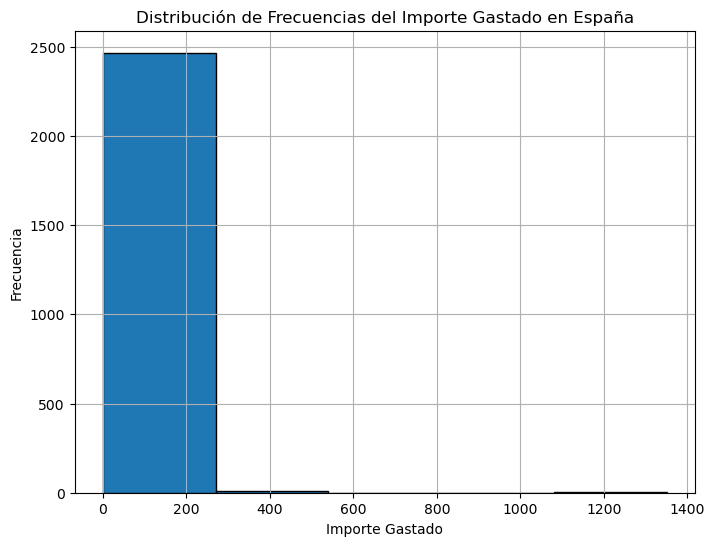

In [45]:
plt.figure(figsize=(8, 6))
plt.hist(orders_spain['amount_spent'], bins=5, edgecolor='black')  # Ajusta el número de bins según sea necesario
plt.title('Distribución de Frecuencias del Importe Gastado en España')
plt.xlabel('Importe Gastado')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

#### Seleccione todos los pedidos realizados en el mes de agosto

In [46]:
orders_ago = pedidos.loc[pedidos['month'] == 8]
print(orders_ago)

        Unnamed: 0  InvoiceNo StockCode  year  month  day  hour  \
199475      285421     561904     22075  2011      8    1     8   
199476      285422     561904    85049E  2011      8    1     8   
199477      285423     561905     21385  2011      8    1     9   
199478      285424     561905    84970L  2011      8    1     9   
199479      285425     561905    84970S  2011      8    1     9   
...            ...        ...       ...   ...    ...  ...   ...   
226483      320688     565067     22644  2011      8    3    17   
226484      320689     565067     22645  2011      8    3    17   
226485      320690     565067     22637  2011      8    3    17   
226486      320691     565067     22646  2011      8    3    17   
226487      320692     565067     22741  2011      8    3    17   

                                Description  Quantity          InvoiceDate  \
199475         6 ribbons elegant christmas         96  2011-08-01 08:30:00   
199476            scandinavian reds rib

#### Seleccione cuántos pedidos se realizan por países en el mes de agosto
##### Pista: Utilice value_counts()

In [52]:
orders_bycountry = orders_ago.groupby('Country').value_counts()
print(orders_bycountry)

Country      Unnamed: 0  InvoiceNo  StockCode  year  month  day  hour  Description                          Quantity  InvoiceDate          UnitPrice  CustomerID  amount_spent
Australia    299898      563179     23268      2011  8      5    14    set of 2 ceramic christmas reindeer  12        2011-08-12 14:19:00  1.45       12431       17.40           1
             299899      563179     23344      2011  8      5    14    jumbo bag 50's christmas             10        2011-08-12 14:19:00  2.08       12431       20.80           1
             304915      563614     22423      2011  8      4    8     regency cakestand 3 tier             32        2011-08-18 08:51:00  10.95      12415       350.40          1
             304939      563614     22619      2011  8      4    8     set of 6 soldier skittles            160       2011-08-18 08:51:00  3.39       12415       542.40          1
             304938      563614     22749      2011  8      4    8     feltcraft princess charlotte doll 

#### ¿Cuál es el gasto medio por país?

In [61]:
orders_bycountry_mean = orders_ago.groupby('Country')['amount_spent'].mean()
print(orders_bycountry_mean)

Country
Australia          210.179439
Austria             17.228182
Belgium             18.319691
Canada              10.312000
Channel Islands     34.977000
Denmark             13.321875
EIRE                28.612782
Finland             22.565574
France              24.272337
Germany             24.177069
Iceland             26.586818
Israel              28.501813
Italy               20.957368
Malta               20.345455
Netherlands        144.027893
Norway              26.309221
Poland              23.635294
Portugal            29.790244
Spain               13.281389
Sweden              35.021500
Switzerland         18.613820
United Kingdom      21.573396
Unspecified         23.088261
Name: amount_spent, dtype: float64


#### ¿Cuál es el artículo más caro?

In [66]:
prod_max = pedidos['UnitPrice'].max()
print(prod_max)

8142.75


#### ¿Cuál fue la cantidad media gastada al año?

In [73]:
orders_mean_year = pedidos.groupby('year')['amount_spent'].mean()
print(orders_mean_year)

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64
